# Experimental Data Analysis
This is the data from the first trial through the Google Forms. We have 2 hypotheses, gradable and non-gradable, with a control and borderline group for 4 different versions

In [108]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import shapiro,norm,ttest_ind, anderson
from itertools import product
%matplotlib inline

In [109]:
FORMS_DIR = "data/experimental_results"
dfs = []
for file in os.listdir(FORMS_DIR):
    print(file)
    df = pd.read_csv(FORMS_DIR+"/"+file)
    df = df.drop("Enter your Kerberos to be entered into the Amazon gift card drawing!",axis=1)
    df["pelty"]=df["Answer on a scale of 1-7, where 1 means you're certain it's not pelty and 7 means you're certain it's pelty. 4 means unsure."]
    df = df.drop("Answer on a scale of 1-7, where 1 means you're certain it's not pelty and 7 means you're certain it's pelty. 4 means unsure.",axis=1)
    df["Timestamp"]=pd.to_datetime(df["Timestamp"])
    df = df[:100]
    dfs.append((file[:-4],df))
dfs=sorted(dfs)
    

Version 2 (Control).csv
Version 3 (Borderline).csv
Version 1 (Borderline).csv
Version 4 (Control).csv


In [110]:
dfs[0][1].tail()

,Timestamp,pelty
95,2019-12-04 00:51:58-05:00,5
96,2019-12-04 01:01:40-05:00,5
97,2019-12-04 01:13:19-05:00,5
98,2019-12-04 01:28:45-05:00,5
99,2019-12-04 06:33:15-05:00,6


(array([ 5.,  8., 20., 22., 22., 18.,  2.,  2.,  0.,  1.]),
 array([0.7349845 , 1.55844668, 2.38190886, 3.20537103, 4.02883321,
        4.85229539, 5.67575756, 6.49921974, 7.32268192, 8.14614409,
        8.96960627]),
 <a list of 10 Patch objects>)

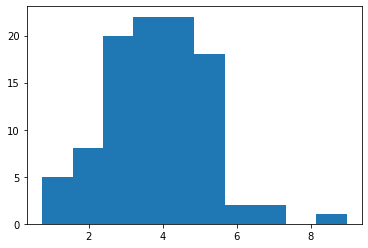

In [111]:
a = np.random.normal(4, 1.4310764472870756, size=100)
plt.hist(a)

{5: 26, 4: 21, 3: 18, 6: 17, 2: 13, 7: 4, 1: 1}
{7: 51, 6: 33, 5: 8, 1: 3, 4: 2, 2: 2, 3: 1}
{7: 40, 6: 34, 5: 19, 4: 4, 2: 2, 3: 1}
{7: 48, 6: 38, 5: 8, 4: 2, 2: 2, 1: 2}


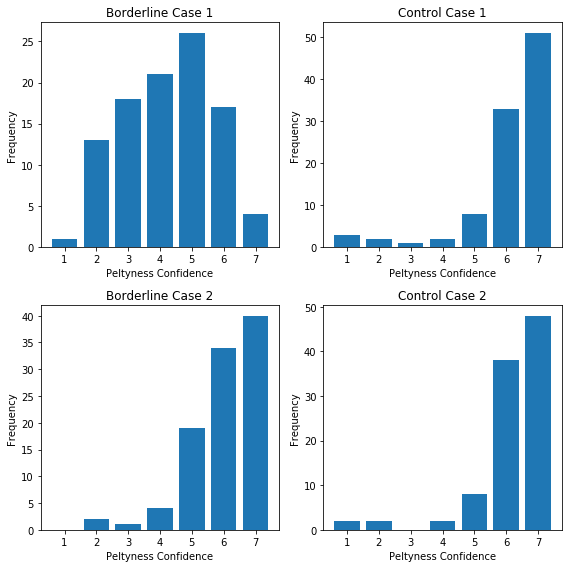

In [112]:
fig,axs = plt.subplots(2,2,figsize=(8,8))
tups = [(0,0),(0,1),(1,0),(1,1)]
means = []
probs = []
stds = []
prob_stds = []
titles = ["Borderline Case 1", "Control Case 1", "Borderline Case 2", "Control Case 2"]
for i in range(len(dfs)):
    name,df = dfs[i]
    x,y = tups[i]
    axs[x,y].set_title(titles[i])
    axs[x,y].set_xlabel("Peltyness Confidence")
    axs[x,y].set_ylabel("Frequency")
    axs[x,y].set_xticks([1,2,3,4,5,6,7])
    
    freqs = dict(df["pelty"].value_counts())
    print(freqs)
    freq_vals = []
    for i in range(7):
        if i+1 in freqs:
            freq_vals.append(freqs[i+1])
        else:
            freq_vals.append(0)
    axs[x,y].bar(np.arange(1,8),freq_vals)
    
    means.append(df["pelty"].describe()['mean'])
    stds.append(df["pelty"].describe()["std"])    
    probs.append(((df["pelty"]-1)/6).describe()['mean'])
    prob_stds.append(((df["pelty"]-1)/6).describe()["std"])
plt.tight_layout()
plt.savefig("imgs/experimental_graphs.png")
plt.show()

In [113]:
# x = np.linspace(mean - 3*std, mean + 3*std, 100)
expected_num = []
for i in range(1,8):
    expected_num.append(100*norm.pdf(i,4.25,1.4310764472870756))

In [114]:
expected_num

[2.114977009452116,
 8.099729169952163,
 19.03598702839767,
 27.454931116626735,
 24.29994957219586,
 13.198678248581489,
 4.399421443128042]

In [115]:
expected = []
for i in range(len(expected_num)):
    num = expected_num[i]
    expected = expected + int(round(num)) * [i+1]

expected = expected + [7,4,5]

In [118]:
# plt.plot(np.linspace(1,7,7),expected)

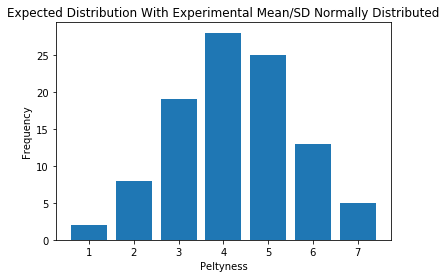

In [119]:
x,y=np.unique(np.array(expected),return_counts=True)
plt.title("Expected Distribution With Experimental Mean/SD Normally Distributed")
plt.xlabel("Peltyness")
plt.ylabel("Frequency")
plt.bar(x,y)
plt.savefig("imgs/chi_square.png")
plt.show()

(array([ 1., 13., 18., 21., 26., 17.,  4.]),
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <a list of 7 Patch objects>)

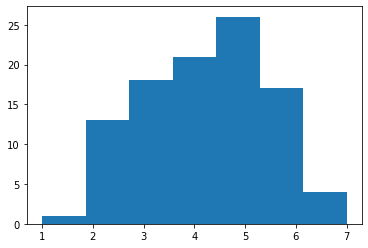

In [120]:
plt.hist(dfs[0][1]['pelty'],bins=7)

In [121]:
from scipy.stats import chisquare
chisquare(dfs[0][1]['pelty'], f_exp=expected)

Power_divergenceResult(statistic=130.33809523809526, pvalue=0.01903751680178324)

In [122]:
stds



[1.4310764472870756,
 1.3532975066163917,
 1.0822722075860272,
 1.2008414558217917]

In [123]:
prob_stds

[0.23851274121451263,
 0.22554958443606518,
 0.18037870126433778,
 0.20014024263696525]

In [124]:
dfs[0][1]['pelty'].value_counts()

5    26
4    21
3    18
6    17
2    13
7     4
1     1
Name: pelty, dtype: int64

In [125]:
anderson(dfs[0][1]['pelty'])

AndersonResult(statistic=2.442759593016632, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [126]:
anderson(dfs[3][1]['pelty'],dist='expon')

AndersonResult(statistic=33.17136414501684, critical_values=array([0.917, 1.072, 1.333, 1.596, 1.945]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [127]:
shapiro(dfs[0][1]['pelty'])

(0.9389769434928894, 0.0001670823257882148)

In [128]:
dfs[0][1]['pelty'].describe()

count    100.000000
mean       4.250000
std        1.431076
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: pelty, dtype: float64

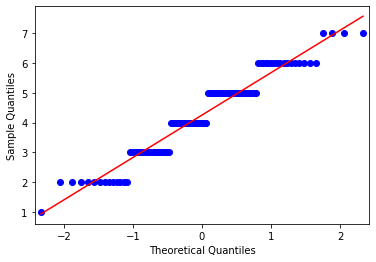

In [129]:
from statsmodels.graphics.gofplots import qqplot
qqplot(dfs[0][1]['pelty'],line='s')
plt.savefig("imgs/qq.png")

(array([ 1.,  0.,  0., 13.,  0., 18.,  0., 21., 26., 21.]),
 array([0.        , 0.19459101, 0.38918203, 0.58377304, 0.77836406,
        0.97295507, 1.16754609, 1.3621371 , 1.55672812, 1.75131913,
        1.94591015]),
 <a list of 10 Patch objects>)

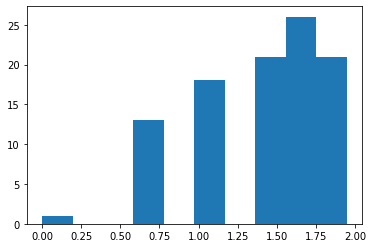

In [130]:
plt.hist(np.log(dfs[0][1]['pelty']))

In [131]:
mean = means[0]
std = stds[0]
mean,std

(4.25, 1.4310764472870756)

{5: 26, 4: 21, 3: 18, 6: 17, 2: 13, 7: 4, 1: 1}


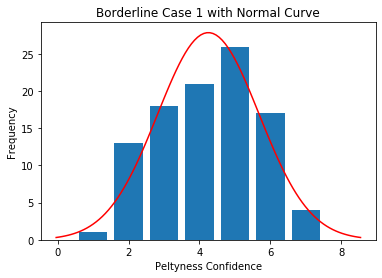

In [132]:
df = dfs[0][1]
freqs = dict(df["pelty"].value_counts())
print(freqs)
freq_vals = []
for i in range(7):
    if i+1 in freqs:
        freq_vals.append(freqs[i+1])
    else:
        freq_vals.append(0)
plt.bar(np.arange(1,8),freq_vals)
plt.ylabel("Frequency")
plt.xlabel("Peltyness Confidence")
plt.title("Borderline Case 1 with Normal Curve")
x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x,100*norm.pdf(x,mean,std),color='r')
plt.savefig("imgs/shapiro.png")
plt.show()

In [135]:
probs = [(m-1)/6 for m in means]

In [136]:
probs

[0.5416666666666666, 0.855, 0.8366666666666666, 0.8633333333333333]

In [137]:
yerr = np.array([[0,0],[1,1],[2,2],[3,3]]).T
yerr.shape

(2, 4)

In [138]:
varss = [s**2 for s in stds]
varss

[2.047979797979798, 1.8314141414141427, 1.1713131313131326, 1.4420202020202]

In [139]:
varss_norm = [v/6 for v in varss]
varss_norm

[0.3413299663299663, 0.30523569023569047, 0.19521885521885543, 0.2403367003367]

In [140]:
[v**0.5 for v in varss_norm]

[0.5842345131280472,
 0.5524813935651502,
 0.44183577856354667,
 0.4902414714573829]

In [141]:
[s/6**0.5 for s in stds]

[0.5842345131280472, 0.5524813935651504, 0.4418357785635467, 0.490241471457383]

In [142]:
means

[4.25, 6.13, 6.02, 6.18]

In [143]:
computational_results = [.34078, .99268, .97422, .99718] 

In [144]:
probs

[0.5416666666666666, 0.855, 0.8366666666666666, 0.8633333333333333]

In [145]:
hypotheses = ['Borderline\nCase 1','Control\nCase 1','Borderline\nCase 2','Control\nCase 2']
groups = ['Experimental', 'Model']
lst = []
for tup in list(product(hypotheses,groups)):
    h,g = tup
    index = hypotheses.index(h)
    if g == "Experimental":
        value = probs[index]
    else:
        value = computational_results[index]
    lst.append([h,g,value])




In [146]:
means

[4.25, 6.13, 6.02, 6.18]

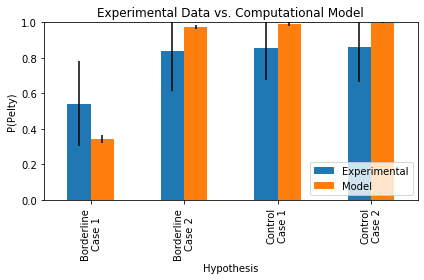

In [158]:
df = pd.DataFrame(lst,columns=['Hypothesis','Group','Value'])
df.pivot('Hypothesis','Group','Value').plot(kind='bar',yerr=np.array([prob_stds,model_stds]))
plt.ylim(0,1)
plt.yticks(np.arange(6)/5)
plt.title("Experimental Data vs. Computational Model")
plt.ylabel("P(Pelty)")
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig("imgs/exp_vs_comp.png")
plt.show()

In [151]:
lst[:4]

[['Borderline\nCase 1', 'Experimental', 0.5416666666666666],
 ['Borderline\nCase 1', 'Model', 0.34078],
 ['Control\nCase 1', 'Experimental', 0.855],
 ['Control\nCase 1', 'Model', 0.99268]]

In [159]:
prob_stds

[0.23851274121451263,
 0.22554958443606518,
 0.18037870126433778,
 0.20014024263696525]

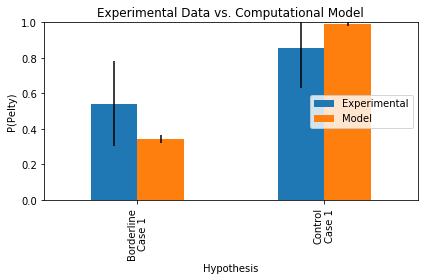

In [169]:
# plt.figure(figsize=(12,6))

df = pd.DataFrame(lst[:4],columns=['Hypothesis','Group','Value'])
df.pivot('Hypothesis','Group','Value').plot(kind='bar',yerr=np.array([prob_stds[:2],model_stds[:2]]))
plt.ylim(0,1)
plt.yticks(np.arange(6)/5)
plt.title("Experimental Data vs. Computational Model")
plt.ylabel("P(Pelty)")
plt.legend(loc='center right')
plt.tight_layout()
plt.savefig("imgs/exp_vs_comp1.png")
plt.show()

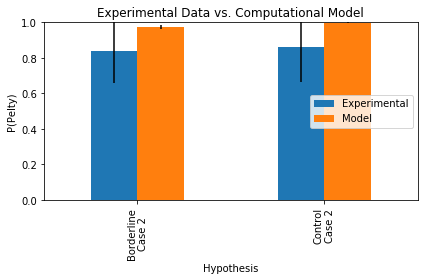

In [170]:
# plt.figure(figsize=(12,6))

df = pd.DataFrame(lst[4:],columns=['Hypothesis','Group','Value'])
df.pivot('Hypothesis','Group','Value').plot(kind='bar',yerr=np.array([prob_stds[2:],model_stds[2:]]))
plt.ylim(0,1)
plt.yticks(np.arange(6)/5)
plt.title("Experimental Data vs. Computational Model")
plt.ylabel("P(Pelty)")
plt.legend(loc='center right')
plt.tight_layout()
plt.savefig("imgs/exp_vs_comp2.png")
plt.show()

In [79]:
prob_stds

[0.23851274121451263,
 0.22554958443606518,
 0.18037870126433778,
 0.20014024263696525]

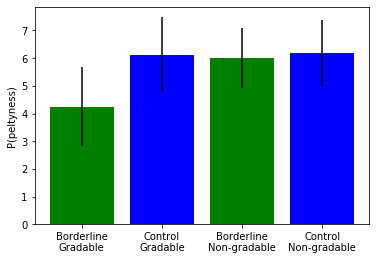

In [80]:
plt.bar(['Borderline\nGradable','Control\nGradable','Borderline\nNon-gradable','Control\nNon-gradable'],means,color=['g','b','g','b'],yerr=[s for s in stds])
# plt.ylim(0,1)
plt.ylabel("P(peltyness)")
# plt.errorbar(1,0.54,0.4)
# add error bars
# statisical significant
# 1 star = .05, 2 star = .01, 3 star = .001
plt.savefig("imgs/average_exp.png")
plt.show()

In [65]:
# plot model outputs

# Hypothesis Testing

In [187]:
ttest_ind(dfs[2][1]['pelty'],dfs[3][1]['pelty'],equal_var=False)

Ttest_indResult(statistic=-0.9897433186107879, pvalue=0.32352049977012387)

# Model Data

In [183]:
FORMS_DIR = "data/model_results"
model_dfs = []
for file in os.listdir(FORMS_DIR):
    print(file)
    df = pd.read_csv(FORMS_DIR+"/"+file)
    if 'P' in df.columns:
        df['Pelty'] = df['P']
    model_dfs.append((file[:-4],df))
model_dfs=sorted(model_dfs,key=lambda tup:tup[0])
    

4control.csv
1borderline.csv
5very.csv
6very.csv
3borderline.csv
2control.csv


In [19]:
len(model_dfs)

6

In [97]:
model_stds = [model_dfs[i][1]['Pelty'].describe()['std'] for i in range(len(model_dfs)-2)]

In [100]:
model_dfs[1][1].shape

(25, 2)

In [86]:
model_stds

[0.02240516494025429,
 0.013582783563516476,
 0.011524755962709137,
 0.0023998116592765972]

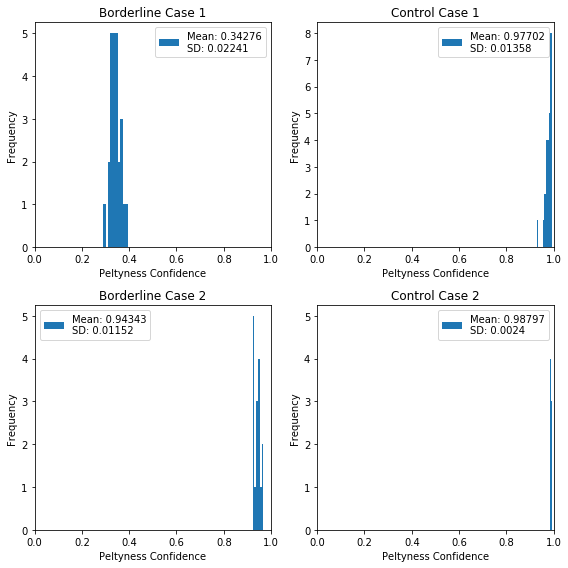

In [101]:
fig,axs = plt.subplots(2,2,figsize=(8,8))
tups = [(0,0),(0,1),(1,0),(1,1)]
means = []
probs = []
stds = []
prob_stds = []
titles = ["Borderline Case 1", "Control Case 1", "Borderline Case 2", "Control Case 2"]
for i in range(len(model_dfs)-2):
    name,df = model_dfs[i]
    x,y = tups[i]
    axs[x,y].set_title(titles[i])
    axs[x,y].set_xlabel("Peltyness Confidence")
    axs[x,y].set_ylabel("Frequency")
    axs[x,y].set_xlim(0,1)
    axs[x,y].hist(df['Pelty'],label="Mean: "+str(round(df['Pelty'].describe()['mean'],5))+"\nSD: "+str(round(df['Pelty'].describe()['std'],5)))
    axs[x,y].legend()

plt.tight_layout()
plt.savefig("imgs/model_graphs.png")
plt.show()

In [225]:
# print(model_dfs[4])

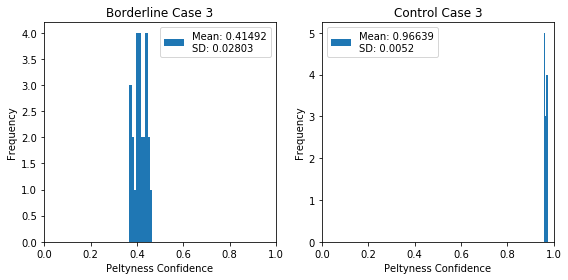

In [192]:
fig,axs = plt.subplots(1,2,figsize=(8,4))
tups = [(0,0),(0,1),(1,0),(1,1)]
means = []
probs = []
stds = []
prob_stds = []
titles = ["Borderline Case 3", "Control Case 3"]
for i in range(2):
    name,df = model_dfs[i+4]
#     x,y = tups[i]
#     print(x,y)
    axs[i].set_title(titles[i])
    axs[i].set_xlabel("Peltyness Confidence")
    axs[i].set_ylabel("Frequency")
    axs[i].set_xlim(0,1)
    axs[i].hist(df['Pelty'],label="Mean: "+str(round(df['Pelty'].describe()['mean'],5))+"\nSD: "+str(round(df['Pelty'].describe()['std'],5)))
    axs[i].legend()

plt.tight_layout()
plt.savefig("imgs/very_pelty_model_graphs.png")
plt.show()

# Very Pelty

In [214]:
FORMS_DIR = "data/experimental_results"
dfs = []
for file in os.listdir(FORMS_DIR):
    if file == "Version 6 (Control).csv" or file == "Version 5 (Borderline).csv":
        print(file)
        df = pd.read_csv(FORMS_DIR+"/"+file)
    #     df = df.drop("Enter your Kerberos to be entered into the Amazon gift card drawing!",axis=1)
        df["pelty"]=df["Answer on a scale of 1-7, where 1 means you're certain it's not pelty and 7 means you're certain it's pelty. 4 means unsure."]
        df = df.drop("Answer on a scale of 1-7, where 1 means you're certain it's not pelty and 7 means you're certain it's pelty. 4 means unsure.",axis=1)
        df["Timestamp"]=pd.to_datetime(df["Timestamp"])
        if "Unnamed: 2" in df.columns:
            df = df.drop("Unnamed: 2",axis=1)
        df = df[:65]
        dfs.append((file[:-4],df))
        print(df.head())
        print(df.columns)
dfs=sorted(dfs)
    

Version 6 (Control).csv
                  Timestamp  pelty
0 2019-12-11 17:15:18-05:00      7
1 2019-12-11 17:15:27-05:00      6
2 2019-12-11 17:15:47-05:00      7
3 2019-12-11 17:17:29-05:00      7
4 2019-12-11 17:17:49-05:00      7
Index(['Timestamp', 'pelty'], dtype='object')
Version 5 (Borderline).csv
                  Timestamp  pelty
0 2019-12-11 17:15:13-05:00      3
1 2019-12-11 17:15:35-05:00      2
2 2019-12-11 17:15:37-05:00      5
3 2019-12-11 17:15:53-05:00      3
4 2019-12-11 17:16:42-05:00      6
Index(['Timestamp', 'pelty'], dtype='object')


In [217]:
# dfs[0]

In [248]:
stds

[1.4019217579396561, 0.9027202480025837]

{5: 22, 2: 15, 4: 13, 3: 8, 6: 5, 1: 2}
{7: 37, 6: 26, 4: 1, 1: 1}


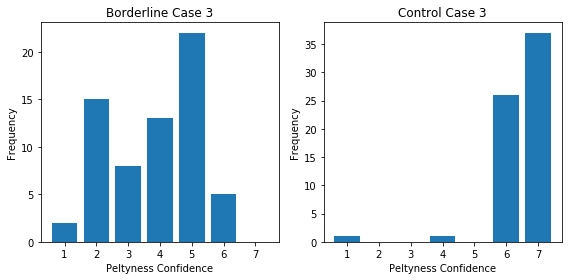

In [222]:
means = []
sds = []
probs = []
prob_stds = []
fig,axs = plt.subplots(1,2,figsize=(8,4))
tups = [(0,0),(0,1),(1,0),(1,1)]
means = []
probs = []
stds = []
prob_stds = []
titles = ["Borderline Case 3", "Control Case 3"]
for i in range(len(dfs)):
    name,df = dfs[i]
#     x,y = tups[i]
    axs[i].set_title(titles[i])
    axs[i].set_xlabel("Peltyness Confidence")
    axs[i].set_ylabel("Frequency")
    axs[i].set_xticks([1,2,3,4,5,6,7])
    
    freqs = dict(df["pelty"].value_counts())
    print(freqs)
    freq_vals = []
    for j in range(7):
        if j+1 in freqs:
            freq_vals.append(freqs[j+1])
        else:
            freq_vals.append(0)
    axs[i].bar(np.arange(1,8),freq_vals)
    
    means.append(df["pelty"].describe()['mean'])
    stds.append(df["pelty"].describe()["std"])    
    probs.append(((df["pelty"]-1)/6).describe()['mean'])
    prob_stds.append(((df["pelty"]-1)/6).describe()["std"])
    
    
plt.tight_layout()
plt.savefig("imgs/very_pelty_experimental_graphs.png")
plt.show()

In [230]:
model_stds = [.02803,.0052]
computational_results = [.41492,.96639]

In [232]:
computational_results

[0.41492, 0.96639]

In [234]:
hypotheses = ['Borderline\nCase 3','Control\nCase 3']
groups = ['Experimental', 'Model']
lst = []
for tup in list(product(hypotheses,groups)):
    h,g = tup
    index = hypotheses.index(h)
    if g == "Experimental":
        value = probs[index]
    else:
        value = computational_results[index]
    lst.append([h,g,value])


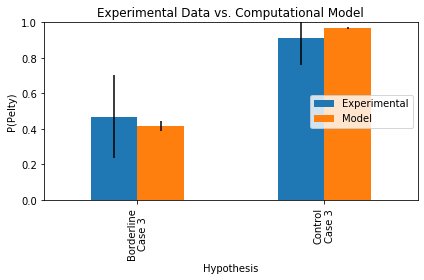

In [236]:
# plt.figure(figsize=(12,6))

df = pd.DataFrame(lst,columns=['Hypothesis','Group','Value'])
df.pivot('Hypothesis','Group','Value').plot(kind='bar',yerr=np.array([prob_stds,model_stds]))
plt.ylim(0,1)
plt.yticks(np.arange(6)/5)
plt.title("Experimental Data vs. Computational Model")
plt.ylabel("P(Pelty)")
plt.legend(loc='center right')
plt.tight_layout()
plt.savefig("imgs/exp_vs_comp3.png")
plt.show()

In [237]:
from seaborn import swarmplot

In [240]:
# dfs[0][1]

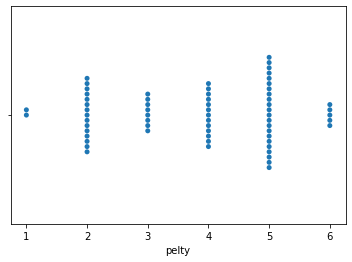

In [242]:
swarmplot(data=dfs,x='pelty')